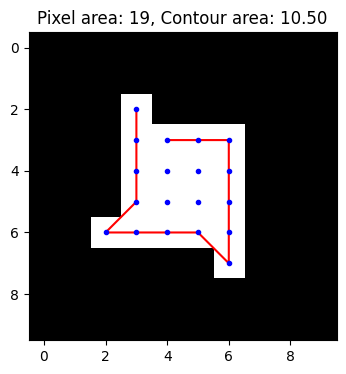

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a small binary mask with a rough shape
mask = np.zeros((10, 10), dtype=np.uint8)
mask[3:7, 3:7] = 255

# Add some diagonal pixels to make a jagged boundary
mask[2, 3] = 255
mask[7, 6] = 255
mask[6, 2] = 255

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Compute pixel area and contour area
pixel_area = np.count_nonzero(mask)
contour_area = cv2.contourArea(contours[0])

# Plot the mask and the contour
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(mask, cmap='gray', origin='upper')
ax.set_title(f"Pixel area: {pixel_area}, Contour area: {contour_area:.2f}")

# Overlay contour
contour_points = contours[0].reshape(-1, 2)
ax.plot(contour_points[:, 0], contour_points[:, -1], color='red', lw=1.5)

# Draw pixel centers
for y in range(mask.shape[0]):
    for x in range(mask.shape[1]):
        if mask[y, x] > 0:
            ax.plot(x, y, 'bo', markersize=3)

plt.show()


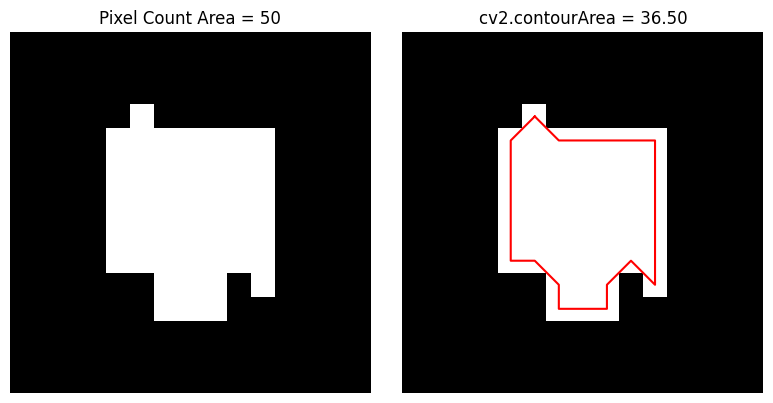

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a rough binary mask with jagged edges
mask = np.zeros((15, 15), dtype=np.uint8)
mask[4:10, 4:11] = 1
mask[7:12, 6:9] = 1
mask[3, 5] = 1
mask[10, 10] = 1

# Get contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]  # shape (N, 1, 2)

# Calculate areas
pixel_area = np.count_nonzero(mask)
contour_area = cv2.contourArea(cnt)

# Draw visualization
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Left: Pixel mask
ax[0].imshow(mask, cmap='gray', interpolation='nearest')
ax[0].set_title(f"Pixel Count Area = {pixel_area}")
ax[0].axis('off')

# Right: Contour overlaid on mask
ax[1].imshow(mask, cmap='gray', interpolation='nearest')

# Close the contour properly
cnt_closed = np.vstack([cnt, cnt[0:1]])  # keep same dimensions
ax[1].plot(cnt_closed[:, 0, 0], cnt_closed[:, 0, 1], color='red', linewidth=1.5)

ax[1].set_title(f"cv2.contourArea = {contour_area:.2f}")
ax[1].axis('off')
plt.savefig('contourArea_vs_PixelArea.png', dpi=300)
plt.tight_layout()
plt.show()


In [2]:
import cv2
python_version = cv2.__version__
print(f"OpenCV version: {python_version}")

OpenCV version: 4.10.0
